In [6]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
#test train split
from sklearn.model_selection import train_test_split

In [7]:
from keras.models import Sequential
#bidirectional lstm
from keras.layers import Bidirectional
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [8]:
goog = yf.Ticker("GOOG")
goog_df = goog.history(period="max")
goog_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2004-08-19 00:00:00-04:00,2.490664,2.591785,2.390042,2.499133,897427216,0.0,0.0
2004-08-20 00:00:00-04:00,2.515820,2.716817,2.503118,2.697639,458857488,0.0,0.0
2004-08-23 00:00:00-04:00,2.758411,2.826406,2.716070,2.724787,366857939,0.0,0.0
2004-08-24 00:00:00-04:00,2.770615,2.779581,2.579581,2.611960,306396159,0.0,0.0
2004-08-25 00:00:00-04:00,2.614201,2.689918,2.587302,2.640104,184645512,0.0,0.0


In [9]:
goog_df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-11-16 00:00:00-05:00,136.960007,138.880005,136.080002,138.699997,17615100,0.0,0.0
2023-11-17 00:00:00-05:00,137.820007,138.000000,135.479996,136.940002,25565300,0.0,0.0
2023-11-20 00:00:00-05:00,135.500000,138.425003,135.490005,137.919998,19569400,0.0,0.0
2023-11-21 00:00:00-05:00,137.940002,138.964996,137.705002,138.619995,17648100,0.0,0.0
2023-11-22 00:00:00-05:00,139.100006,141.100006,139.000000,140.020004,17306400,0.0,0.0


In [94]:
#google df to csv
goog_df.to_csv('goog_df.csv')

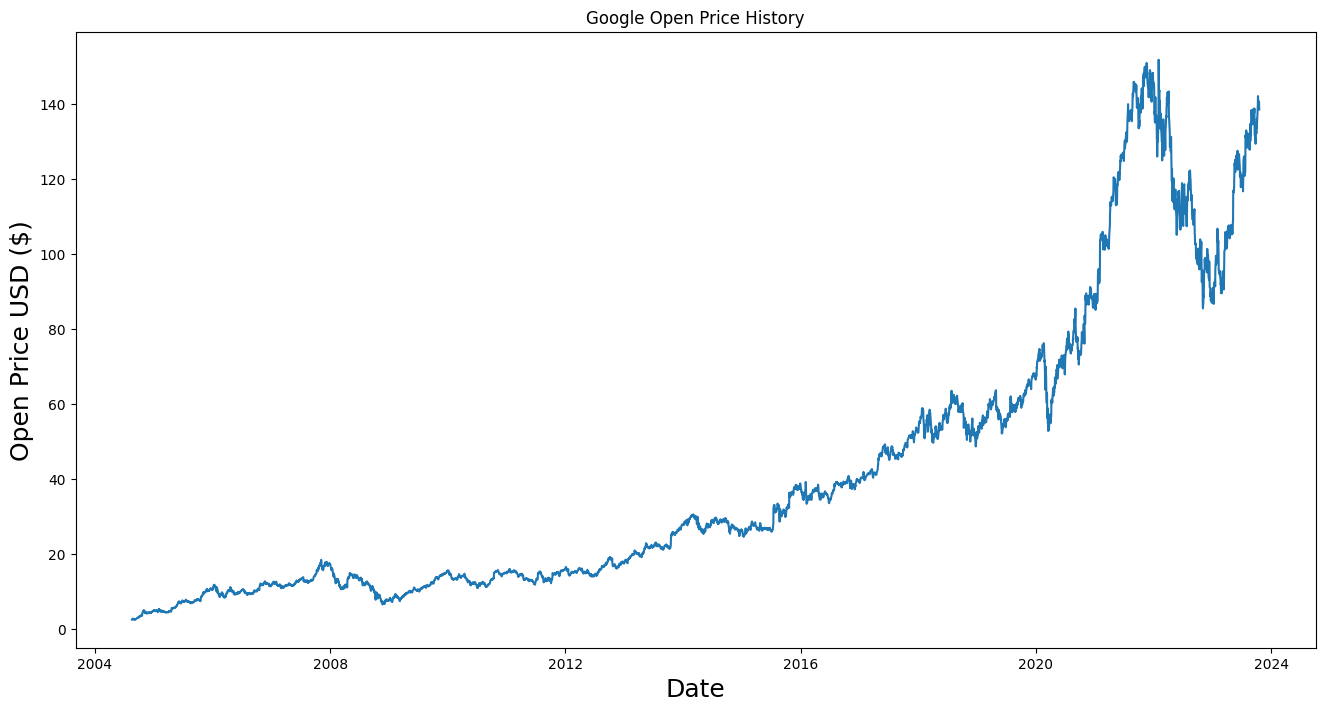

In [98]:
#plot the open price with date on x axis

plt.figure(figsize=(16,8))
plt.title('Google Open Price History')
plt.plot(goog_df['Date'],goog_df['Open'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price USD ($)', fontsize=18)
plt.show()




In [99]:
#split the csv with top 4345 rows in train csv and bottom 482 rows in test csv
goog_df_train = goog_df.iloc[:4345]
goog_df_test = goog_df.iloc[4345:]

In [100]:
goog_df_test

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
4345,2021-11-19 00:00:00-05:00,151.000000,151.850006,149.887497,149.952499,19766000,0.0,0.0
4346,2021-11-22 00:00:00-05:00,150.141754,150.744507,147.005493,147.078506,24608000,0.0,0.0
4347,2021-11-23 00:00:00-05:00,147.113007,147.694000,144.889496,146.757004,18126000,0.0,0.0
4348,2021-11-24 00:00:00-05:00,146.350006,147.000000,145.199005,146.717499,16464000,0.0,0.0
4349,2021-11-26 00:00:00-05:00,145.015503,145.296997,142.485504,142.806000,16992000,0.0,0.0
...,...,...,...,...,...,...,...,...
4822,2023-10-16 00:00:00-04:00,139.729996,140.904999,139.320007,140.490005,17345600,0.0,0.0
4823,2023-10-17 00:00:00-04:00,140.029999,141.250000,138.529007,140.990005,17424000,0.0,0.0
4824,2023-10-18 00:00:00-04:00,140.750000,141.990005,138.705002,139.279999,18304900,0.0,0.0
4825,2023-10-19 00:00:00-04:00,139.800003,141.005005,138.600006,138.979996,21812600,0.0,0.0


In [92]:
# goog_df=goog_df.reset_index()

In [93]:
# from sklearn.model_selection import train_test_split
# #make sure that the split is not random

# train_data, test_data = train_test_split(goog_df, test_size=0.1, random_state=42)
# train_data.to_csv('walmart_train_data.csv', index=False)
# test_data.to_csv('walmart_test_data.csv', index=False)

In [86]:
# goog_df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2004-08-19 00:00:00-04:00,2.490664,2.591785,2.390042,2.499133,897427216,0.0,0.0
1,2004-08-20 00:00:00-04:00,2.515820,2.716817,2.503118,2.697639,458857488,0.0,0.0
2,2004-08-23 00:00:00-04:00,2.758411,2.826406,2.716070,2.724787,366857939,0.0,0.0
3,2004-08-24 00:00:00-04:00,2.770615,2.779581,2.579581,2.611960,306396159,0.0,0.0
4,2004-08-25 00:00:00-04:00,2.614201,2.689918,2.587302,2.640104,184645512,0.0,0.0
...,...,...,...,...,...,...,...,...
4821,2023-10-13 00:00:00-04:00,140.649994,141.339996,137.970001,138.580002,19438700,0.0,0.0
4822,2023-10-16 00:00:00-04:00,139.729996,140.904999,139.320007,140.490005,17345600,0.0,0.0
4823,2023-10-17 00:00:00-04:00,140.029999,141.250000,138.529007,140.990005,17424000,0.0,0.0
4824,2023-10-18 00:00:00-04:00,140.750000,141.990005,138.705002,139.279999,18304900,0.0,0.0


In [106]:
#training_set = train_data.iloc[:, 3:4].values
training_set=goog_df_train.iloc[:, 1:2].values
testing_set=goog_df_test.iloc[:, 1:2].values

In [107]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [109]:
training_set_scaled

array([[1.36745703e-04],
       [3.07260884e-04],
       [1.95161600e-03],
       ...,
       [9.94377408e-01],
       [9.94773953e-01],
       [9.94211301e-01]])

In [110]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 4343):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [139]:
X_train.shape

(4283, 60, 1)

In [111]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [112]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [113]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.4))

In [114]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.4))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.4))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100))
regressor.add(Dropout(0.4))

In [115]:
# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 20, batch_size = 30)

Epoch 1/20
143/143 [==============================] - 25s 138ms/step - loss: 0.0039
Epoch 2/20
143/143 [==============================] - 20s 142ms/step - loss: 0.0016
Epoch 3/20
143/143 [==============================] - 22s 156ms/step - loss: 0.0013
Epoch 4/20
143/143 [==============================] - 25s 172ms/step - loss: 0.0012
Epoch 5/20
143/143 [==============================] - 24s 165ms/step - loss: 0.0011
Epoch 6/20
143/143 [==============================] - 24s 165ms/step - loss: 9.3276e-04
Epoch 7/20
143/143 [==============================] - 26s 183ms/step - loss: 0.0013
Epoch 8/20
143/143 [==============================] - 25s 175ms/step - loss: 0.0011
Epoch 9/20
143/143 [==============================] - 26s 179ms/step - loss: 9.4554e-04
Epoch 10/20
143/143 [==============================] - 25s 174ms/step - loss: 9.2476e-04
Epoch 11/20
143/143 [==============================] - 25s 171ms/step - loss: 9.3154e-04
Epoch 12/20
143/143 [==============================] - 25s

In [116]:
real_stock_price = goog_df_test.iloc[:, 1:2].values

In [117]:
real_stock_price

array([[151.        ],
       [150.14175415],
       [147.11300659],
       [146.3500061 ],
       [145.01550293],
       [144.29849243],
       [145.45025635],
       [144.2124939 ],
       [141.82400513],
       [144.49549866],
       [143.57400513],
       [145.94999695],
       [148.33149719],
       [148.17599487],
       [149.1000061 ],
       [148.44400024],
       [144.77000427],
       [144.36599731],
       [148.07699585],
       [142.7144928 ],
       [140.67959595],
       [143.1499939 ],
       [144.1000061 ],
       [147.0894928 ],
       [147.46350098],
       [148.37449646],
       [146.42950439],
       [146.44999695],
       [145.54400635],
       [144.47549438],
       [145.55050659],
       [144.18099976],
       [137.49749756],
       [137.90499878],
       [135.09899902],
       [138.18049622],
       [141.55450439],
       [141.84049988],
       [137.5       ],
       [136.6000061 ],
       [136.93850708],
       [136.51400757],
       [133.01199341],
       [126

In [118]:
dataset_total = pd.concat((goog_df_train['Open'], goog_df_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(goog_df_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, goog_df_test.shape[0]+60):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

16/16 [==============================] - 2s 38ms/step


In [10]:
predicted_stock_price.shape

NameError: name 'predicted_stock_price' is not defined

In [119]:
goog_df_test.shape[0]

482

In [120]:
real_stock_price

array([[151.        ],
       [150.14175415],
       [147.11300659],
       [146.3500061 ],
       [145.01550293],
       [144.29849243],
       [145.45025635],
       [144.2124939 ],
       [141.82400513],
       [144.49549866],
       [143.57400513],
       [145.94999695],
       [148.33149719],
       [148.17599487],
       [149.1000061 ],
       [148.44400024],
       [144.77000427],
       [144.36599731],
       [148.07699585],
       [142.7144928 ],
       [140.67959595],
       [143.1499939 ],
       [144.1000061 ],
       [147.0894928 ],
       [147.46350098],
       [148.37449646],
       [146.42950439],
       [146.44999695],
       [145.54400635],
       [144.47549438],
       [145.55050659],
       [144.18099976],
       [137.49749756],
       [137.90499878],
       [135.09899902],
       [138.18049622],
       [141.55450439],
       [141.84049988],
       [137.5       ],
       [136.6000061 ],
       [136.93850708],
       [136.51400757],
       [133.01199341],
       [126

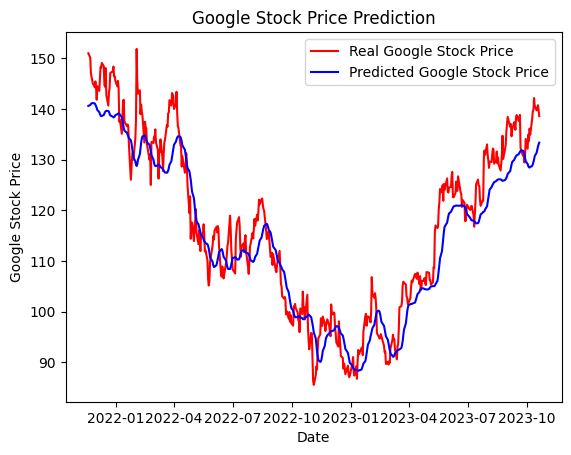

In [121]:
# Visualising the results
plt.plot(goog_df_test['Date'],real_stock_price,color = 'red', label = 'Real Google Stock Price')
plt.plot(goog_df_test['Date'],predicted_stock_price,color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [130]:
#mse
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(real_stock_price, predicted_stock_price)

#abse
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(real_stock_price, predicted_stock_price)
#rmse
from math import sqrt
rmse = sqrt(mse)
# print mse, mae and rmse
print('Mean Squared Error:',mse)
print('Mean Absolute Error:',mae)
print('Root Mean Squared Error:',rmse)



Mean Squared Error: 32.14590565558268
Mean Absolute Error: 4.6625456434067845
Root Mean Squared Error: 5.669735942315364


In [125]:
#bilstm
# Initialising the RNN
regressorb = Sequential()
#Adding the first BiLSTM layer and some Dropout regularisation
regressorb.add(Bidirectional(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2]))))
regressorb.add(Dropout(0.4))
# Adding a second BiLSTM layer and some Dropout regularisation
regressorb.add(Bidirectional(LSTM(units = 100, return_sequences = True)))
regressorb.add(Dropout(0.4))
# Adding a third BiLSTM layer and some Dropout regularisation
regressorb.add(Bidirectional(LSTM(units = 100, return_sequences = True)))
regressorb.add(Dropout(0.4))
# Adding a fourth BiLSTM layer and some Dropout regularisation
regressorb.add(Bidirectional(LSTM(units = 100)))
regressorb.add(Dropout(0.4))
# Adding the output layer
regressorb.add(Dense(units = 1))
# Compiling the RNN
regressorb.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting the RNN to the Training set
regressorb.fit(X_train, y_train, epochs = 20, batch_size = 30)







Epoch 1/20
143/143 [==============================] - 52s 295ms/step - loss: 0.0027
Epoch 2/20
143/143 [==============================] - 44s 310ms/step - loss: 0.0013
Epoch 3/20
143/143 [==============================] - 47s 329ms/step - loss: 0.0012
Epoch 4/20
143/143 [==============================] - 47s 331ms/step - loss: 8.1649e-04
Epoch 5/20
143/143 [==============================] - 49s 341ms/step - loss: 7.8341e-04
Epoch 6/20
143/143 [==============================] - 46s 320ms/step - loss: 7.5182e-04
Epoch 7/20
143/143 [==============================] - 44s 311ms/step - loss: 8.6933e-04
Epoch 8/20
143/143 [==============================] - 46s 323ms/step - loss: 8.5092e-04
Epoch 9/20
143/143 [==============================] - 46s 324ms/step - loss: 6.9592e-04
Epoch 10/20
143/143 [==============================] - 47s 330ms/step - loss: 7.5584e-04
Epoch 11/20
143/143 [==============================] - 47s 327ms/step - loss: 6.3588e-04
Epoch 12/20
143/143 [=====================

In [126]:
dataset_total = pd.concat((goog_df_train['Open'], goog_df_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(goog_df_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, goog_df_test.shape[0]+60):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_priceb = regressorb.predict(X_test)
predicted_stock_priceb = sc.inverse_transform(predicted_stock_priceb)

16/16 [==============================] - 2s 41ms/step


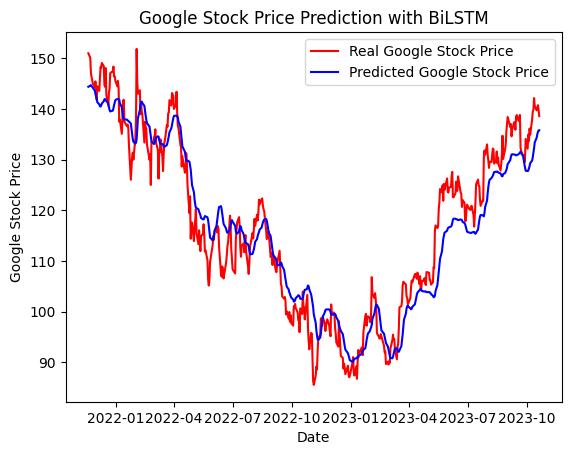

In [127]:
# Visualising the results
plt.plot(goog_df_test['Date'],real_stock_price,color = 'red', label = 'Real Google Stock Price')
plt.plot(goog_df_test['Date'],predicted_stock_priceb,color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction with BiLSTM')
plt.xlabel('Date')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [129]:
#mse
from sklearn.metrics import mean_squared_error
mseb = mean_squared_error(real_stock_price, predicted_stock_priceb)
#abse
from sklearn.metrics import mean_absolute_error
maeb = mean_absolute_error(real_stock_price, predicted_stock_priceb)
#rmse
from math import sqrt
rmseb = sqrt(mseb)
# print mse, mae and accuracy
print('Mean Squared Error:',mseb)
print('Mean Absolute Error:',maeb)
print('Root Mean Squared Error:',rmseb)



Mean Squared Error: 29.039262760849017
Mean Absolute Error: 4.3796730991221064
Root Mean Squared Error: 5.3888090299108775


In [131]:
#a combination of lstm and bilstm with 2 lstm layers and 2 bilstm layers
# Initialising the RNN
regressor2 = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
regressor2.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
regressor2.add(Dropout(0.4))
# Adding a second LSTM layer and some Dropout regularisation
regressor2.add(LSTM(units = 100, return_sequences = True))
regressor2.add(Dropout(0.4))
# Adding the first BiLSTM layer and some Dropout regularisation
regressor2.add(Bidirectional(LSTM(units = 100, return_sequences = True)))
regressor2.add(Dropout(0.4))
# Adding the second BiLSTM layer and some Dropout regularisation
regressor2.add(Bidirectional(LSTM(units = 100)))
regressor2.add(Dropout(0.4))
# Adding the output layer
regressor2.add(Dense(units = 1))
# Compiling the RNN
regressor2.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting the RNN to the Training set
regressor2.fit(X_train, y_train, epochs = 20, batch_size = 30)


Epoch 1/20
143/143 [==============================] - 36s 189ms/step - loss: 0.0038
Epoch 2/20
143/143 [==============================] - 30s 210ms/step - loss: 9.7277e-04
Epoch 3/20
143/143 [==============================] - 30s 210ms/step - loss: 0.0010
Epoch 4/20
143/143 [==============================] - 30s 211ms/step - loss: 8.7814e-04
Epoch 5/20
143/143 [==============================] - 30s 209ms/step - loss: 0.0010
Epoch 6/20
143/143 [==============================] - 32s 222ms/step - loss: 7.8959e-04
Epoch 7/20
143/143 [==============================] - 35s 243ms/step - loss: 9.3518e-04
Epoch 8/20
143/143 [==============================] - 35s 248ms/step - loss: 7.4391e-04
Epoch 9/20
143/143 [==============================] - 34s 234ms/step - loss: 8.9353e-04
Epoch 10/20
143/143 [==============================] - 34s 236ms/step - loss: 6.0300e-04
Epoch 11/20
143/143 [==============================] - 34s 236ms/step - loss: 6.5316e-04
Epoch 12/20
143/143 [=====================

In [132]:
#predicting the stock price
dataset_total = pd.concat((goog_df_train['Open'], goog_df_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(goog_df_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, goog_df_test.shape[0]+60):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price2 = regressor2.predict(X_test)
predicted_stock_price2 = sc.inverse_transform(predicted_stock_price2)


16/16 [==============================] - 2s 41ms/step


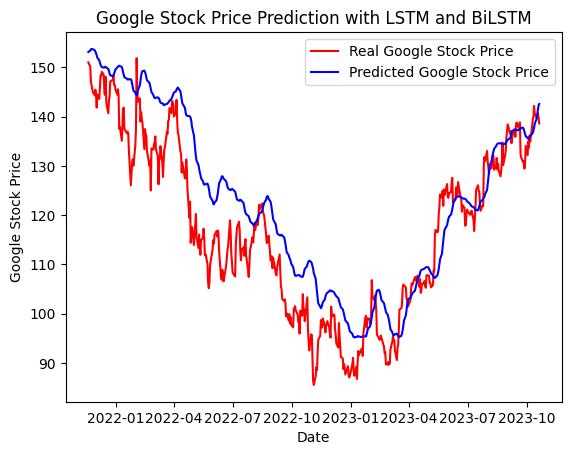

In [133]:
# Visualising the results
plt.plot(goog_df_test['Date'],real_stock_price,color = 'red', label = 'Real Google Stock Price')
plt.plot(goog_df_test['Date'],predicted_stock_price2,color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction with LSTM and BiLSTM')
plt.xlabel('Date')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


In [134]:
#mse
from sklearn.metrics import mean_squared_error
mse2 = mean_squared_error(real_stock_price, predicted_stock_price2)
#abse
from sklearn.metrics import mean_absolute_error
mae2 = mean_absolute_error(real_stock_price, predicted_stock_price2)
#rmse
from math import sqrt
rmse2 = sqrt(mse2)
# print mse, mae and accuracy
print('Mean Squared Error:',mse2)
print('Mean Absolute Error:',mae2)
print('Root Mean Squared Error:',rmse2)


Mean Squared Error: 79.28674494011095
Mean Absolute Error: 7.146800963215808
Root Mean Squared Error: 8.904310469660802


In [149]:
##a combination of lstm and bilstm with 1 lstm layer, 1 bilstm layers, 1 lstm layer and 1 bilstm layer
# Initialising the RNN
regressor3 = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
regressor3.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
regressor3.add(Dropout(0.4))
# Adding the first BiLSTM layer and some Dropout regularisation
regressor3.add(Bidirectional(LSTM(units = 100, return_sequences = True)))
regressor3.add(Dropout(0.4))
# Adding the second LSTM layer and some Dropout regularisation
regressor3.add(LSTM(units = 100, return_sequences = True))
regressor3.add(Dropout(0.4))
# Adding the second BiLSTM layer and some Dropout regularisation
regressor3.add(Bidirectional(LSTM(units = 100)))
regressor3.add(Dropout(0.4))
# Adding the output layer
regressor3.add(Dense(units = 1))
# Compiling the RNN
regressor3.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting the RNN to the Training set
regressor3.fit(X_train, y_train, epochs = 20, batch_size = 30)


Epoch 1/20
143/143 [==============================] - 35s 197ms/step - loss: 0.0030
Epoch 2/20
143/143 [==============================] - 31s 218ms/step - loss: 0.0010
Epoch 3/20
143/143 [==============================] - 36s 253ms/step - loss: 9.2536e-04
Epoch 4/20
143/143 [==============================] - 34s 237ms/step - loss: 0.0010
Epoch 5/20
143/143 [==============================] - 34s 238ms/step - loss: 9.8182e-04
Epoch 6/20
143/143 [==============================] - 37s 256ms/step - loss: 8.3400e-04
Epoch 7/20
143/143 [==============================] - 32s 222ms/step - loss: 7.0386e-04
Epoch 8/20
143/143 [==============================] - 31s 217ms/step - loss: 8.1471e-04
Epoch 9/20
143/143 [==============================] - 38s 263ms/step - loss: 6.6767e-04
Epoch 10/20
143/143 [==============================] - 35s 244ms/step - loss: 7.3461e-04
Epoch 11/20
143/143 [==============================] - 31s 215ms/step - loss: 7.4372e-04
Epoch 12/20
143/143 [=====================

In [150]:
#predicting the stock price
dataset_total = pd.concat((goog_df_train['Open'], goog_df_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(goog_df_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, goog_df_test.shape[0]+60):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price3 = regressor3.predict(X_test)
predicted_stock_price3 = sc.inverse_transform(predicted_stock_price3)


16/16 [==============================] - 4s 56ms/step


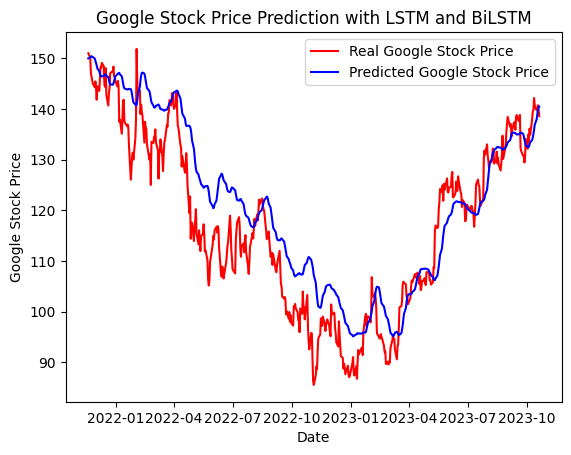

In [151]:
#visualising the results
plt.plot(goog_df_test['Date'],real_stock_price,color = 'red', label = 'Real Google Stock Price')
plt.plot(goog_df_test['Date'],predicted_stock_price3,color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction with LSTM and BiLSTM')
plt.xlabel('Date')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


In [152]:
#mse
mse3 = mean_squared_error(real_stock_price, predicted_stock_price3)
#abse
mae3 = mean_absolute_error(real_stock_price, predicted_stock_price3)
#rmse
rmse3 = sqrt(mse3)
# print mse, mae and rmse
print('Mean Squared Error:',mse3)
print('Mean Absolute Error:',mae3)
print('Root Mean Squared Error:',rmse3)



Mean Squared Error: 59.536028637959795
Mean Absolute Error: 6.121836982822023
Root Mean Squared Error: 7.715959346572518


In [147]:
X_train.shape

(4283, 60, 1)

In [ ]:
#try attention layer
vocab_size = X_train.shape[0]
embedding_size = X_train.shape[1]

model = Sequential()

model.add(X_train(
        input_dim=vocab_size,
        output_dim=embedding_size,
        input_length=max_length,
        trainable=False,
        mask_zero=True,
        weights=[embeddings]
    ))

model.add(LSTM(200, return_sequences=False, activation='softmax'))
model.add(Dropout(0.5))

model.add(Dense(3, activation='softmax', activity_regularizer=activity_l2(0.0001)))


In [1]:
from keras.layers import Layer
import keras.backend as K
from keras import initializers

class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        # Create a trainable weight variable for this layer.
        self.W_q = self.add_weight(name='W_q',
                                  shape=(input_shape[-1], input_shape[-1]),
                                  initializer=initializers.get('glorot_uniform'),
                                  trainable=True)
        
        self.W_k = self.add_weight(name='W_k',
                                  shape=(input_shape[-1], input_shape[-1]),
                                  initializer=initializers.get('glorot_uniform'),
                                  trainable=True)
        
        super(AttentionLayer, self).build(input_shape)  # Be sure to call this at the end

    def call(self, x):
        q = K.dot(x, self.W_q)
        k = K.dot(x, self.W_k)
        v = x

        attn_score = K.dot(q, K.transpose(k))
        attn_score = K.softmax(attn_score)
        
        output = K.batch_dot(attn_score, v)

        return output

    def compute_output_shape(self, input_shape):
        return input_shape


In [4]:
##a combination of lstm and bilstm with 1 lstm layer and 1 attention  layer
# Initialising the RNN

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
regressor3 = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
regressor3.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
regressor3.add(Dropout(0.4))
# Adding the first BiLSTM layer and some Dropout regularisation
#regressor3.add(Bidirectional(LSTM(units = 100, return_sequences = True)))
#regressor3.add(Dropout(0.4))
# Adding the second LSTM layer and some Dropout regularisation
regressor3.add(AttentionLayer())
# Adding the output layer
regressor3.add(Dense(units = 1))
# Compiling the RNN
regressor3.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting the RNN to the Training set
regressor3.fit(X_train, y_train, epochs = 20, batch_size = 30)


NameError: name 'X_train' is not defined

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, input_shape=(sequence_length, num_features), return_sequences=True))
model.add(AttentionLayer())
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

# Train your model with your stock price data
# model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size)


In [145]:
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Bidirectional, LSTM, Attention, Concatenate, Dense
from tensorflow.keras.models import Model

# Assuming your input shape is (sequence_length, number_of_features)
input_shape = (X_train.shape[0], X_train.shape[1])
input_layer = Input(shape=input_shape)

# CNN Layer
cnn_output = Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer)
cnn_output = MaxPooling1D(pool_size=2)(cnn_output)

# BiLSTM Layer
bilstm_output = Bidirectional(LSTM(units=64, return_sequences=True))(cnn_output)

# Attention Layer
attention_output = Attention()([bilstm_output, bilstm_output])

# Concatenate BiLSTM and Attention outputs
merged_output = Concatenate(axis=-1)([bilstm_output, attention_output])

# Fully Connected Layers
dense_output = Dense(units=32, activation='relu')(merged_output)
output_layer = Dense(units=1, activation='linear')(dense_output)  # Assuming regression task (predicting stock prices)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model (choose appropriate loss and optimizer based on your task)
model.compile(loss='mean_squared_error', optimizer='adam')

# Print the summary of the model architecture
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 4283, 60)]   0           []                               
                                                                                                  
 conv1d_3 (Conv1D)              (None, 4281, 64)     11584       ['input_3[0][0]']                
                                                                                                  
 max_pooling1d_2 (MaxPooling1D)  (None, 2140, 64)    0           ['conv1d_3[0][0]']               
                                                                                                  
 bidirectional_11 (Bidirectiona  (None, 2140, 128)   66048       ['max_pooling1d_2[0][0]']        
 l)                                                                                         

In [153]:
X_train.shape

(4283, 60, 1)

In [146]:
model.fit(X_train, y_train, epochs=50, batch_size=32)#, validation_data=(X_test, y_test))

# Make predictions
predictions = model.predict(X_test)

Epoch 1/50


ValueError: in user code:

    File "C:\Users\varsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\varsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\varsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\varsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\varsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\varsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model_1" is incompatible with the layer: expected shape=(None, 4283, 60), found shape=(None, 60, 1)


In [136]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Conv1D, Bidirectional, LSTM, Dense, Attention
from tensorflow.keras.optimizers import Adam

# Load and preprocess your stock price data (as shown previously)
# ...

# Define the input shape
input_shape = (X_train.shape[1], X_train.shape[2])

# Build the model
model = Sequential()

# Convolutional Layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))

# BiLSTM Layer
model.add(Bidirectional(LSTM(64, return_sequences=True)))

# Attention Layer
input_layer = Input(shape=input_shape)
attn_layer = Attention()([model.layers[-1].output, input_layer])
output_layer = Dense(1)(attn_layer)
attention_model = Model(inputs=[input_layer, model.input], outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model (you can adjust epochs and batch size as needed)
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model and analyze the results
# ...

# Optionally, save the model
# model.save('stock_prediction_model.h5')


ValueError: Exception encountered when calling layer "attention_1" (type Attention).

Dimensions must be equal, but are 128 and 1 for '{{node attention_1/MatMul}} = BatchMatMulV2[T=DT_FLOAT, adj_x=false, adj_y=true](Placeholder, Placeholder_1)' with input shapes: [?,58,128], [?,60,1].

Call arguments received by layer "attention_1" (type Attention):
  • inputs=['tf.Tensor(shape=(None, 58, 128), dtype=float32)', 'tf.Tensor(shape=(None, 60, 1), dtype=float32)']
  • mask=None
  • training=False
  • return_attention_scores=False
  • use_causal_mask=False

In [135]:
# creating a neural network with a CNN layer, BiLSTM layer and Attention layer for stock prediction
# Importing the Keras libraries and packages
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Activation
#import attention layer

from keras.layers import Attention
# Initialising the RNN
regressor3 = Sequential()
# Adding the first CNN layer and some Dropout regularisation
regressor3.add(Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
regressor3.add(MaxPooling1D(3))
regressor3.add(Dropout(0.4))
# Adding the BiLSTM layer and some Dropout regularisation
regressor3.add(Bidirectional(LSTM(units = 100, return_sequences = True)))
regressor3.add(Dropout(0.4))
# Adding the Attention layer
regressor3.add(Attention())
# Adding the output layer
regressor3.add(Dense(units = 1))
# Compiling the RNN
regressor3.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting the RNN to the Training set
regressor3.fit(X_train, y_train, epochs = 20, batch_size = 30)




ValueError: Exception encountered when calling layer "attention" (type Attention).

Attention layer must be called on a list of inputs, namely [query, value] or [query, value, key]. Received: Tensor("Placeholder:0", shape=(None, 19, 200), dtype=float32).

Call arguments received by layer "attention" (type Attention):
  • inputs=tf.Tensor(shape=(None, 19, 200), dtype=float32)
  • mask=None
  • training=False
  • return_attention_scores=False
  • use_causal_mask=False

In [41]:

import pandas_datareader as pdr

In [42]:
key = '8138a60a6bcc7cdfa486834b128d5ce3c3a3e417'

In [43]:

df = pdr.get_data_tiingo('GOOG', api_key=key)


C:\Users\varsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [44]:

df.to_csv('GOOG.csv')

In [45]:

df.head()

close     high      low     open   volume  \
symbol date                                                                     
GOOG   2018-10-22 00:00:00+00:00  1101.16  1112.23  1091.00  1103.06  1514220   
       2018-10-23 00:00:00+00:00  1103.69  1107.89  1070.00  1080.89  1848654   
       2018-10-24 00:00:00+00:00  1050.71  1106.12  1048.74  1104.25  1982430   
       2018-10-25 00:00:00+00:00  1095.57  1110.98  1069.55  1071.79  2545839   
       2018-10-26 00:00:00+00:00  1071.47  1106.53  1034.09  1037.03  4187586   

                                  adjClose  adjHigh   adjLow  adjOpen  \
symbol date                                                             
GOOG   2018-10-22 00:00:00+00:00   55.0580  55.6115  54.5500  55.1530   
       2018-10-23 00:00:00+00:00   55.1845  55.3945  53.5000  54.0445   
       2018-10-24 00:00:00+00:00   52.5355  55.3060  52.4370  55.2125   
       2018-10-25 00:00:00+00:00   54.7785  55.5490  53.4775  53.5895   
       2018-10-26 00:00:00+00:00   53.5735  55.3265  51.7045  51.8515   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
GOOG   2018-10-22 00:00:00+00:00   30284400      0.0          1.0  
       2018-10-23 00:00:00+00:00   36973080      0.0          1.0  
       2018-10-24 00:00:00+00:00   39648600      0.0          1.0  
       2018-10-25 00:00:00+00:00   50916780      0.0          1.0  
       2018-10-26 00:00:00+00:00   83751720      0.0          1.0

In [46]:

df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1257 entries, ('GOOG', Timestamp('2018-10-22 00:00:00+0000', tz='UTC')) to ('GOOG', Timestamp('2023-10-19 00:00:00+0000', tz='UTC'))
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   close        1257 non-null   float64
 1   high         1257 non-null   float64
 2   low          1257 non-null   float64
 3   open         1257 non-null   float64
 4   volume       1257 non-null   int64  
 5   adjClose     1257 non-null   float64
 6   adjHigh      1257 non-null   float64
 7   adjLow       1257 non-null   float64
 8   adjOpen      1257 non-null   float64
 9   adjVolume    1257 non-null   int64  
 10  divCash      1257 non-null   float64
 11  splitFactor  1257 non-null   float64
dtypes: float64(10), int64(2)
memory usage: 163.9+ KB


In [83]:
df1

array([[0.34724587],
       [0.34810915],
       [0.33003149],
       ...,
       [0.01961995],
       [0.01903647],
       [0.01893411]])

In [47]:

df1 = df.reset_index() ['close']

In [48]:
df1.shape

(1257,)

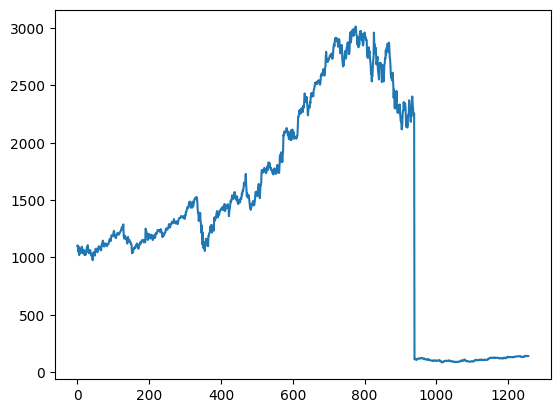

In [49]:

import matplotlib.pyplot as plt
plt.plot(df1)

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
     

In [51]:

training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size
train_data,test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

In [52]:

import numpy
#converting the array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step):
    a = dataset[i:(i+time_step), 0]  # 1,2,3 ... 100 where y will get 101 value
    dataX.append(a)
    dataY.append(dataset[i+time_step, 0])
  return numpy.array(dataX), numpy.array(dataY)

In [53]:

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [54]:

print(X_train.shape[1])

100


In [55]:

len(test_data)

440

In [56]:

print(X_test.shape, "", y_test.shape)

(340, 100)  (340,)


In [58]:

from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import tensorflow as tf

In [59]:
def build_LSTM_model():
    input = tf.keras.layers.Input(
        shape=(X_train.shape[1], 1), name ="input"
    )
    x = tf.keras.layers.Bidirectional(LSTM(128, return_sequences=True))(input)
       
    x = tf.keras.layers.Bidirectional(LSTM(64, return_sequences=False, dropout=0.5))(x)
    
    x = tf.keras.layers.Dense(25 , activation="softmax")(x)
    
    output = tf.keras.layers.Dense(1)(x)
               
    model = tf.keras.Model(inputs=input, outputs=output, name="BI_LSTM")
    
    return model

model = build_LSTM_model()
model.summary()

Model: "BI_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 100, 1)]          0         
                                                                 
 bidirectional (Bidirectiona  (None, 100, 256)         133120    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 25)                3225      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 300,723
Trainable params: 300,723
Non-trainab

In [60]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
     


In [61]:

model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
12/12 [==============================] - 13s 680ms/step - loss: 0.2217 - accuracy: 0.0000e+00 - val_loss: 0.1342 - val_accuracy: 0.0029
Epoch 2/100
12/12 [==============================] - 6s 494ms/step - loss: 0.0635 - accuracy: 0.0000e+00 - val_loss: 0.2241 - val_accuracy: 0.0029
Epoch 3/100
12/12 [==============================] - 6s 521ms/step - loss: 0.0513 - accuracy: 0.0014 - val_loss: 0.2420 - val_accuracy: 0.0000e+00
Epoch 4/100
12/12 [==============================] - 6s 481ms/step - loss: 0.0487 - accuracy: 0.0014 - val_loss: 0.2556 - val_accuracy: 0.0000e+00
Epoch 5/100
12/12 [==============================] - 6s 492ms/step - loss: 0.0473 - accuracy: 0.0014 - val_loss: 0.2669 - val_accuracy: 0.0000e+00
Epoch 6/100
12/12 [==============================] - 6s 473ms/step - loss: 0.0464 - accuracy: 0.0014 - val_loss: 0.2774 - val_accuracy: 0.0000e+00
Epoch 7/100
12/12 [==============================] - 6s 500ms/step - loss: 0.0458 - accuracy: 0.0014 - val_loss: 0.28

In [62]:

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

11/11 [==============================] - 0s 36ms/step


In [63]:

train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [64]:

import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

1858.6406880964894

In [65]:

math.sqrt(mean_squared_error(y_test, test_predict))

1142.703590606297

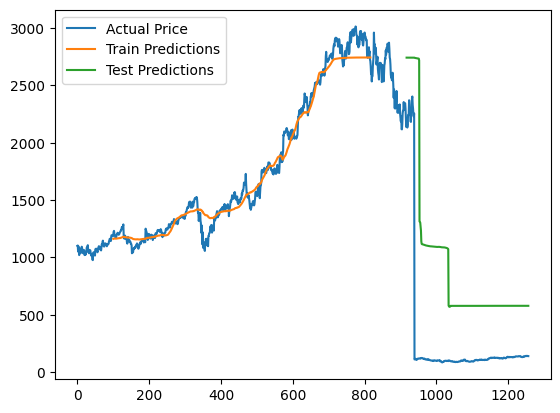

In [73]:

#Plotting
#shift train predictions for plotting
look_back = 100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
#shift test predict for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2):len(df1), :] = test_predict
#plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Actual Price', 'Train Predictions', 'Test Predictions'])
plt.show()

In [67]:

x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [68]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [69]:
from numpy import array

lst_output=[]
n_steps = 100
i=0
while(i<30):
  if(len(temp_input)>100):
    #print(temp_input)
    x_input=np.array(temp_input[1:])
    print("{} day input {}".format(i,x_input))
    x_input=x_input.reshape(1,-1)
    x_input=x_input.reshape((1,n_steps,1))
    #print(x_input)
    yhat = model.predict(x_input, verbose=0)
    print("{} day output {}".format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input=temp_input[1:]
    #print(temp_input)
    lst_output.extend(yhat.tolist())
    i=i+1
  else:
    x_input=x_input.reshape((1, n_steps,1))
    yhat = model.predict(x_input,verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    lst_output.extend(yhat.tolist())
    i=i+1

print(lst_output)

[0.16863981]
101
1 day input [0.01360772 0.01394893 0.01424238 0.01472008 0.01515684 0.01346099
 0.01336887 0.01343711 0.01394211 0.01396941 0.01395235 0.01443346
 0.01384316 0.0137715  0.01288775 0.01377833 0.01348829 0.01214731
 0.01212001 0.01282633 0.01246123 0.0127888  0.0126489  0.01335522
 0.01277515 0.01250559 0.01138981 0.01167643 0.01232815 0.01410589
 0.01440275 0.01418437 0.01384998 0.0134064  0.01229745 0.01256359
 0.0130993  0.01340981 0.01575397 0.01582562 0.01689704 0.01693117
 0.01651488 0.01540593 0.01545029 0.01537181 0.01653194 0.01649782
 0.01592117 0.01594164 0.01592799 0.01649441 0.01596211 0.0155663
 0.01602694 0.01522508 0.01550488 0.01576421 0.01696529 0.01601329
 0.01610542 0.01648076 0.01774326 0.01823461 0.01837792 0.01819026
 0.01815955 0.01770232 0.01798553 0.01832674 0.018511   0.01794117
 0.01842911 0.01893752 0.01870208 0.01892728 0.01888293 0.01743617
 0.01633404 0.0162965  0.01661042 0.01568231 0.01636816 0.01693799
 0.01650123 0.01763407 0.016996   

In [70]:

day_new = np.arange(1,100)
day_pred = np.arange(100,130)

In [71]:

df3 = df1.tolist()
df3.extend(lst_output)

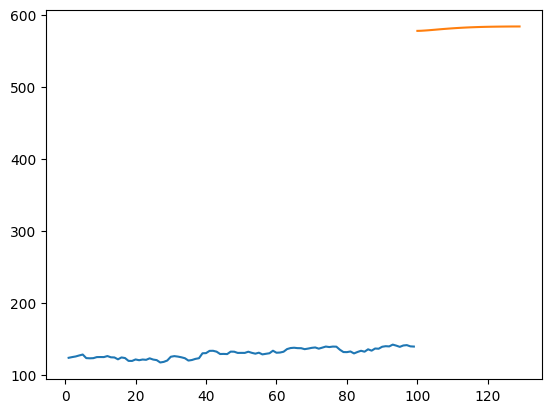

In [74]:
plt.plot(day_new,scaler.inverse_transform(df1[len(df1)-99:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
     